<h1>Model: Model 2 from Emotion Project</h1>

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages

In [2]:
import keras
import pandas as pd
import tensorflow as tf

import numpy as np
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D, GlobalAveragePooling2D, Input,AveragePooling2D, BatchNormalization, LeakyReLU

# from keras.applications import MobileNet
# from keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

from collections import defaultdict
from PIL import Image

Using TensorFlow backend.


<h2>Data Loading and Preparation</h2>

In [3]:
def getSpeciesCode(x):
    part = x.split('_')
    if part[0] == 'ASETRI':
        return 0
    elif part[0] == 'EPTBOT':
        return 1
    elif part[0] == 'MYOEMA':
        return 2
    elif part[0] == 'PIPKUH':
        return 3
    elif part[0] == 'RHIMUS':
        return 4
    elif part[0] == 'RHYNAS':
        return 5
    elif part[0] == 'ROUAEG':
        return 6
    elif part[0] == 'TAPPER':
        return 7
    else:
        return 'Unknown'
    
def getSpecies(x):
    if x == 0:
        return 'ASETRI'
    elif x == 1:
        return 'EPTBOT'
    elif x == 2:
        return 'MYOEMA'
    elif x == 3:
        return 'PIPKUH'
    elif x == 4:
        return 'RHIMUS'
    elif x == 5:
        return 'RHYNAS'
    elif x == 6:
        return 'ROUAEG'
    elif x == 7:
        return 'TAPPER'
    else:
        return 'Unknown'

In [4]:
image_folder_path = 'data/SpectogramInitial'
file_paths = [f for f in os.listdir(image_folder_path)]
species = []
for file_name in file_paths:
    sp = file_name.split('_')
    species.append(sp[0])

df = pd.DataFrame(species, columns=['Species'])
df['Species'].value_counts()

RHIMUS    1799
TAPPER     429
PIPKUH     303
RHYNAS     271
EPTBOT     131
ROUAEG     121
MYOEMA     114
ASETRI      25
Name: Species, dtype: int64

[array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [246],
        [137],
        ...,
        [129],
        [192],
        [255]],

       [[255],
        [236],
        [  5],
        ...,
        [  0],
        [122],
        [255]],

       ...,

       [[255],
        [236],
        [  5],
        ...,
        [  0],
        [122],
        [255]],

       [[255],
        [246],
        [137],
        ...,
        [129],
        [192],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8), array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [246],
        [137],
        ...,
        [129],
        [192],
        [255]],

       [[255],
        [236],
        [  5],
        ...,
        [  0],
        [122],
        [255]],

       ...,

       [[255],

TypeError: Invalid shape (112, 170, 1) for image data

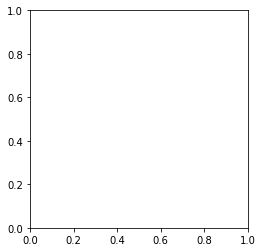

In [5]:
X_all = []
Y_all = []

image_folder_path = 'data/SpectogramInitial'
file_paths = [f for f in os.listdir(image_folder_path)]

for file_name in file_paths:
    spectrogram = Image.open(image_folder_path + '/' + file_name)
    spectrogram = spectrogram.convert('L') # to 'L'-> grey scale
    spectrogram = spectrogram.resize((170, 112))  
    spectrogram = np.array(spectrogram)
    spectrogram = np.expand_dims(spectrogram, axis=2) #-> to expand the dimensions accross the Z axis- for 2d CNN
    X_all.append(spectrogram)
    Y_all.append(getSpeciesCode(file_name))
    
print(X_all)
print(Y_all)
plt.imshow(X_all[0])


In [6]:
X_all = np.array(X_all)
Y_all = np.array(Y_all)

print(X_all.shape)
print(Y_all.shape)

X_all = X_all.astype('float32')
X_all /= 255

Y_all = np_utils.to_categorical(Y_all, num_classes=8)

print(X_all)
print(Y_all)

(3193, 112, 170, 1)
(3193,)
[[[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [0.9647059 ]
   [0.5372549 ]
   ...
   [0.5058824 ]
   [0.7529412 ]
   [1.        ]]

  [[1.        ]
   [0.9254902 ]
   [0.01960784]
   ...
   [0.        ]
   [0.47843137]
   [1.        ]]

  ...

  [[1.        ]
   [0.9254902 ]
   [0.01960784]
   ...
   [0.        ]
   [0.47843137]
   [1.        ]]

  [[1.        ]
   [0.9647059 ]
   [0.5372549 ]
   ...
   [0.5058824 ]
   [0.7529412 ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]]


 [[[1.        ]
   [1.        ]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [0.9647059 ]
   [0.5372549 ]
   ...
   [0.5058824 ]
   [0.7529412 ]
   [1.        ]]

  [[1.        ]
   [0.9254902 ]
   [0.01960784]
   ...
   [0.        ]
   [0.47843137]
   [1.        ]]

  ...

  [[1.     

In [7]:
# train /test= 80/20% split
# Data is stratified
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size=0.2, random_state = 123, stratify=Y_all)



<h2>Model Building</h2>

In [43]:
def build_current_model():
    inp = Input(shape=(112,170,1))
    
    c1 = Convolution2D(filters=128,kernel_size=(5,5),strides=(2,2),padding='same')(inp)
    bt = BatchNormalization()(c1)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = MaxPooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.2)(mpool)

    
    c2 = Convolution2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='same')(mpool)
    bt = BatchNormalization()(c2)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = AveragePooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.3)(mpool)
    
    c2 = Convolution2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='same')(mpool)
    bt = BatchNormalization()(c2)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = AveragePooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.3)(mpool)
    
    c3 = Convolution2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='same')(mpool)
    bt = BatchNormalization()(c3)
    bt = Activation('relu')(bt)
    #bt = LeakyReLU(alpha=0.01)(bt)
    mpool = AveragePooling2D(pool_size=(2,2),strides=2,padding='same')(bt)
    mpool = Dropout(0.4)(mpool)
    
    f = Flatten()(mpool)
    
    x_dense = Dense(2048)(f)
    bt = BatchNormalization()(x_dense)
    bt = Activation('relu')(bt)
    bt = Dropout(0.4)(bt)

    
    x_dense = Dense(2048)(bt)
    bt = BatchNormalization()(x_dense)
    bt = Activation('relu')(bt)
    bt = Dropout(0.3)(bt)
    
    x_dense = Dense(512)(bt)
    bt = BatchNormalization()(x_dense)
    bt = Activation('relu')(bt)
    bt = Dropout(0.2)(bt)

    x_out = Dense(8, name='output', activation='softmax')(bt)
    
    model = Model(inputs=inp, outputs=x_out)
    model.compile(optimizer=Adam(lr=0.003), 
                  loss='categorical_crossentropy', 
                  metrics = ['accuracy'])
    return model


In [44]:
model = build_current_model()
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 112, 170, 1)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 85, 128)       3328      
_________________________________________________________________
batch_normalization_35 (Batc (None, 56, 85, 128)       512       
_________________________________________________________________
activation_35 (Activation)   (None, 56, 85, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 43, 128)       0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 28, 43, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 22, 256)       2951

In [ ]:
#tf.keras.utils.plot_model(model, "Model-.png", show_shapes=True)

In [45]:
history = model.fit(X_train, Y_train, 
              epochs = 100, 
              validation_split=0.1, 
              verbose=1, 
              batch_size = 8)

history_info = history.history

Train on 2298 samples, validate on 256 samples
Epoch 1/100
2298/2298 [==============================] - 5s 2ms/sample - loss: 1.6749 - acc: 0.5209 - val_loss: 1.6355 - val_acc: 0.5664
Epoch 2/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 1.3954 - acc: 0.5775 - val_loss: 2.2297 - val_acc: 0.6523
Epoch 3/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 1.2812 - acc: 0.6005 - val_loss: 5.4210 - val_acc: 0.6680
Epoch 4/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 1.1535 - acc: 0.6332 - val_loss: 1.0028 - val_acc: 0.6562
Epoch 5/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 1.0478 - acc: 0.6462 - val_loss: 0.9515 - val_acc: 0.6523
Epoch 6/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.9518 - acc: 0.6789 - val_loss: 0.8914 - val_acc: 0.6992
Epoch 7/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.8734 - acc: 0.7045 - val_loss: 1.3858 - val_acc: 0

2298/2298 [==============================] - 4s 2ms/sample - loss: 0.1056 - acc: 0.9669 - val_loss: 0.1815 - val_acc: 0.9648
Epoch 61/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.1567 - acc: 0.9530 - val_loss: 0.4215 - val_acc: 0.9062
Epoch 62/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.2106 - acc: 0.9365 - val_loss: 0.1969 - val_acc: 0.9570
Epoch 63/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.1182 - acc: 0.9621 - val_loss: 0.2623 - val_acc: 0.9375
Epoch 64/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.1085 - acc: 0.9652 - val_loss: 0.2912 - val_acc: 0.9336
Epoch 65/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.1431 - acc: 0.9582 - val_loss: 0.3180 - val_acc: 0.9336
Epoch 66/100
2298/2298 [==============================] - 4s 2ms/sample - loss: 0.0894 - acc: 0.9700 - val_loss: 0.2705 - val_acc: 0.9492
Epoch 67/100
2298/2298 [=======================

<h2>Evaluation (Basic)</h2>

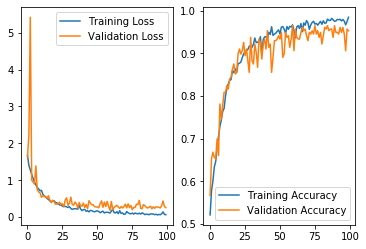

In [46]:
## Loss and accuracy history
_, axs = plt.subplots(ncols=2)
df_history_info = pd.DataFrame(history_info) 


sns.lineplot(data=df_history_info['loss'],ax=axs[0], label='Training Loss', legend='brief')
sns.lineplot(data=df_history_info['val_loss'],ax=axs[0], label='Validation Loss', legend='brief')

sns.lineplot(data=df_history_info['acc'],ax=axs[1], label='Training Accuracy', legend='brief')
sns.lineplot(data=df_history_info['val_acc'],ax=axs[1], label='Validation Accuracy', legend='brief')

In [47]:
def generate_actual_predicted(Y_pred, X_test, Y_test): 
    predicted = list()
    for i in range(len(Y_pred)):
        predicted.append(np.argmax(Y_pred[i]))
        
    actual = list()
    for i in range(len(Y_test)):
        actual.append(np.argmax(Y_test[i]))
        
    return actual, predicted

[[  4   0   0   0   0   0   1   0]
 [  0  25   0   0   0   1   0   0]
 [  0   0  18   0   0   0   5   0]
 [  0   0   0  60   1   0   0   0]
 [  0   5   2   0 347   0   4   2]
 [  0   2   0   0   1  50   1   0]
 [  0   0   0   0   0   0  24   0]
 [  0   0   1   0   1   0   0  84]]


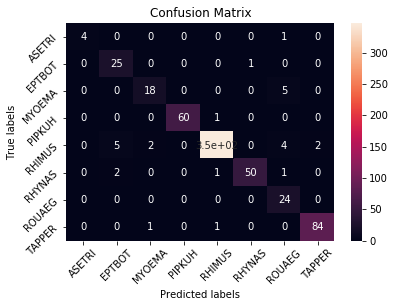

In [48]:
Y_pred = model.predict(X_test)
actual, predicted = generate_actual_predicted(Y_pred, X_test, Y_test)

##Confusion Matrix
from sklearn.metrics import confusion_matrix
actual_labeled = list()
predict_labeled = list()
for x,y in zip(actual,predicted):
    actual_labeled.append(getSpecies(x))
    predict_labeled.append(getSpecies(y))

labels = ['ASETRI','EPTBOT','MYOEMA','PIPKUH','RHIMUS','RHYNAS', 'ROUAEG', 'TAPPER']
cm=confusion_matrix(actual_labeled,predict_labeled,labels=labels)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=45); ax.yaxis.set_ticklabels(labels,rotation=45);

In [49]:
## Test accuracy
from sklearn.metrics import accuracy_score
print('accuracy', accuracy_score(actual, predicted))


accuracy 0.9577464788732394


In [50]:
## Precision, Recall, F1, Support
from sklearn.metrics import classification_report
print(classification_report(actual_labeled, predict_labeled,labels=labels))

              precision    recall  f1-score   support

      ASETRI       1.00      0.80      0.89         5
      EPTBOT       0.78      0.96      0.86        26
      MYOEMA       0.86      0.78      0.82        23
      PIPKUH       1.00      0.98      0.99        61
      RHIMUS       0.99      0.96      0.98       360
      RHYNAS       0.98      0.93      0.95        54
      ROUAEG       0.69      1.00      0.81        24
      TAPPER       0.98      0.98      0.98        86

    accuracy                           0.96       639
   macro avg       0.91      0.92      0.91       639
weighted avg       0.96      0.96      0.96       639



In [51]:
##ROC AUC Scores
from sklearn.metrics import roc_auc_score
print('One-vs-One ROC AUC scores:')
print(roc_auc_score(actual, Y_pred, average='macro', multi_class='ovo'), '(macro)')
print(roc_auc_score(actual, Y_pred, average='weighted', multi_class='ovo'), '(weighted by prevalence)')


print()
print('One-vs-Rest ROC AUC scores:')
print(roc_auc_score(actual, Y_pred, average='macro', multi_class='ovr'), '(macro)')
print(roc_auc_score(actual, Y_pred, average='weighted', multi_class='ovr'), '(weighted by prevalence)')

One-vs-One ROC AUC scores:
0.9972734469598376 (macro)
0.9975577297076725 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.997926253612562 (macro)
0.9972182192880208 (weighted by prevalence)


/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


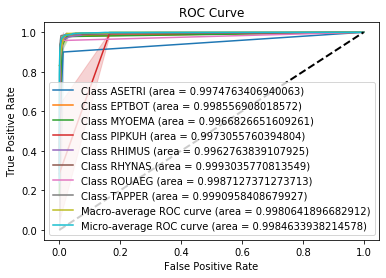

In [52]:
## ROC Curves
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from scipy import interp

### The following curves are generated s.t each point is a model from differing thresholds

### ROC Curves + AUC per class

_, axs = plt.subplots(ncols=1)
axs.set(xlabel='False Positive Rate',ylabel='True Positive Rate', title='ROC Curve')

fpr = [0] * 8
tpr = [0] * 8
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], Y_pred[:,i])
    auc_val = auc(fpr[i], tpr[i])
    sns.lineplot(x=fpr[i],y=tpr[i],ax=axs, label='Class '+ getSpecies(i) +' (area = ' + str(auc_val) + ')', legend='brief')

#### Micro/Macro ROC Curves + AUC over all classes

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(8)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(8):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 8

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)
fpr_micro, tpr_micro,_ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

sns.lineplot(x=fpr_macro,y=tpr_macro,ax=axs, label='Macro-average ROC curve (area = ' + str(roc_auc_macro) + ')', legend='brief')
sns.lineplot(x=fpr_micro,y=tpr_micro,ax=axs, label='Micro-average ROC curve (area = ' + str(roc_auc_micro) + ')', legend='brief')

## Diagonal line for comparison
plt.plot([0, 1], [0, 1], 'k--', lw=2)

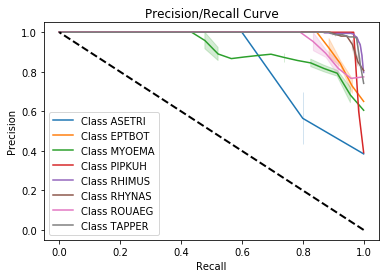

In [53]:
## Precision/Recall Curves per class
### The following curves are generated s.t each point is a model from differing thresholds
from sklearn.metrics import precision_recall_curve

_, axs = plt.subplots(ncols=1)
axs.set(xlabel='Recall',ylabel='Precision', title='Precision/Recall Curve')

prec = [0] * 8
rec = [0] * 8
for i in range(8):
    prec[i], rec[i], _ = precision_recall_curve(Y_test[:,i], Y_pred[:,i])
    sns.lineplot(x=rec[i],y=prec[i],ax=axs, label='Class '+ getSpecies(i), legend='brief')

# Diagonal line for comparison
plt.plot([1, 0], [0, 1], 'k--', lw=2)

<h2>K-Fold Training and Evaluation</h2>

In [ ]:
#Precision Mean and Standard Deviation
#Recall Mean and Standard Deviation
#F1 Measure Mean and Standard Deviation
#True Positive Rate. Mean and Standard Deviation
#False Negative Rate Mean and Standard Deviation
#Best/Worst ROC
#Best/Worst Precision/Recall
#Accuracy Mean and Standard Deviation

In [99]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

all_base_precision = list()
all_base_recall = list()
all_macro_precision = list()
all_macro_recall = list()
all_f1 = list()
all_macro_f1 = list()


all_tpr = list()
all_fpr = list()
all_precision = list()
all_recall = list()

all_accuracy = list()


n_split=2
n_classes=8

y_all_labelled=[]
for i in range(len(Y_all)):
        y_all_labelled.append(np.argmax(Y_all[i]))
        
        
for train_index,test_index in StratifiedKFold(n_split).split(X_all,y_all_labelled):  
    # use the index to generate training an testing sets
    x_train,x_test=X_all[train_index],X_all[test_index]
    y_train,y_test=Y_all[train_index],Y_all[test_index]

       
    # create and fit the model
    cv_model=build_current_model()
    history = cv_model.fit(x_train, y_train,
              batch_size=8,
              epochs=5,
              validation_split=0.2,
              verbose=1)
    
    
    


Train on 1436 samples, validate on 160 samples


ResourceExhaustedError: OOM when allocating tensor of shape [2048,512] and type float
	 [[node Adam_20/dense_56/kernel/v/Initializer/zeros (defined at <ipython-input-99-6d742964543f>:40) ]]

Original stack trace for 'Adam_20/dense_56/kernel/v/Initializer/zeros':
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-99-6d742964543f>", line 40, in <module>
    verbose=1)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 780, in fit
    steps_name='steps_per_epoch')
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training_arrays.py", line 157, in model_iteration
    f = _make_execution_function(model, mode)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training_arrays.py", line 532, in _make_execution_function
    return model._make_execution_function(mode)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 2276, in _make_execution_function
    self._make_train_function()
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 2219, in _make_train_function
    params=self._collected_trainable_weights, loss=self.total_loss)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py", line 497, in get_updates
    return [self.apply_gradients(grads_and_vars)]
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py", line 435, in apply_gradients
    self._create_slots(var_list)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/adam.py", line 147, in _create_slots
    self.add_slot(var, 'v')
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py", line 578, in add_slot
    initial_value=initial_value)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 261, in __call__
    return cls._variable_v2_call(*args, **kwargs)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 255, in _variable_v2_call
    shape=shape)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 236, in <lambda>
    previous_getter = lambda **kws: default_variable_creator_v2(None, **kws)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/variable_scope.py", line 2544, in default_variable_creator_v2
    shape=shape)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/variables.py", line 263, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 460, in __init__
    shape=shape)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py", line 604, in _init_from_args
    initial_value() if init_from_fn else initial_value,
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py", line 114, in __call__
    return array_ops.zeros(shape, dtype)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 1883, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3613, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3616, in create_op
    op_def=op_def)
  File "/home/team3/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
#generate predictions
    y_pred = cv_model.predict(x_test)
    actual, predicted = generate_actual_predicted(y_pred, x_test, y_test)
    
    #calc metrics
    curr_base_prec, curr_base_rec, curr_f1, _ = precision_recall_fscore_support(actual, predicted)
    curr_macro_prec = precision_score(actual, predicted,average='macro')
    curr_macro_rec = recall_score(actual, predicted,average='macro')
    curr_macro_f1 = f1_score(actual, predicted,average='macro')

    
    curr_fpr = [0] * n_classes
    curr_tpr = [0] * n_classes
    for i in range(n_classes):
        curr_fpr[i], curr_tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
        
    curr_prec = [0] * n_classes
    curr_rec = [0] * n_classes
    for i in range(n_classes):
        curr_prec[i], curr_rec[i], _ = precision_recall_curve(y_test[:,i], y_pred[:,i])

        
    curr_accuracy = accuracy_score(actual, predicted)
    
    #add to lists
    all_base_precision.append(curr_base_prec)
    all_base_recall.append(curr_base_rec)
    all_macro_precision.append(curr_macro_prec)
    all_macro_recall.append(curr_macro_rec)
    
    all_f1.append(curr_f1)
    all_macro_f1.append(curr_macro_f1)
    
    all_accuracy.append(curr_accuracy)

    
    all_fpr.append(curr_fpr)
    all_tpr.append(curr_tpr)
    all_precision.append(curr_prec)
    all_recall.append(curr_rec)
    

In [41]:
print('precision mean by class', np.array(all_base_precision).mean(axis=0))
print('precision sdev by class', np.array(all_base_precision).std(axis=0))

print('macro precision mean', np.array(all_macro_precision).mean())
print('macro precision sdev', np.array(all_macro_precision).std())


print('recall mean', np.array(all_base_recall).mean(axis=0))
print('recall sdev', np.array(all_base_recall).std(axis=0))

print('macro recall mean', np.array(all_macro_recall).mean())
print('macro recall sdev', np.array(all_macro_recall).std())

print('f1 mean', np.array(all_f1).mean(axis=0))
print('f1 sdev', np.array(all_f1).std(axis=0))

print('macro f1 mean', np.array(all_macro_f1).mean())
print('macro f1 sdev', np.array(all_macro_f1).std())

print('accuracy mean', np.array(all_accuracy).mean())
print('accuracy sdev', np.array(all_accuracy).std())



precision mean by class [0.88571429 0.87153439 0.70958909 0.91343842 0.95338087 0.90168978
 0.72148583 0.90002852]
precision sdev by class [0.13997084 0.10559932 0.12171053 0.05004052 0.01881217 0.06727244
 0.07803762 0.04616472]
macro precision mean 0.8571076487231309
macro precision sdev 0.032282370039727254
recall mean [0.88       0.81680912 0.72055336 0.80562842 0.96830548 0.87804714
 0.867      0.87652531]
recall sdev [0.09797959 0.07835846 0.15345745 0.09313271 0.01008175 0.07571444
 0.08117471 0.06341585]
macro recall mean 0.8516086019772828
macro recall sdev 0.0523656364289099
f1 mean [0.86666667 0.83727858 0.71343269 0.85249527 0.96064379 0.88603225
 0.78363498 0.8872432 ]
f1 sdev [0.02721655 0.05856313 0.13667158 0.0598758  0.00983683 0.04755575
 0.05820894 0.04831847]
macro f1 mean 0.8484284283594183
macro f1 sdev 0.04079476230774175
accuracy mean 0.9132613164181886
accuracy sdev 0.024119104451238115


IndexError: list index out of range

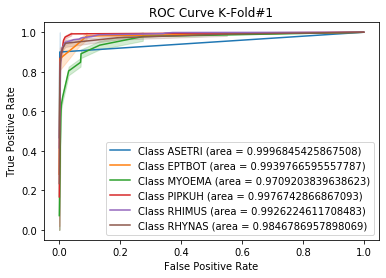

In [67]:
# Plot all K-Fold ROC curves

for i in range(n_split):
    _, axs = plt.subplots(ncols=1)
    axs.set(xlabel='False Positive Rate',ylabel='True Positive Rate', title='ROC Curve K-Fold#'+str(i+1))
    for j in range(n_classes):
        auc_val = auc(all_fpr[i][j], all_tpr[i][j])
        sns.lineplot(x=all_fpr[i][j],y=all_tpr[i][j],ax=axs, label='Class '+ getSpecies(j) +' (area = ' + str(auc_val) + ')', legend='brief')
        

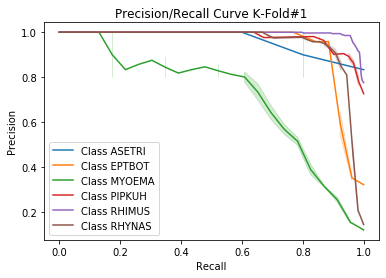

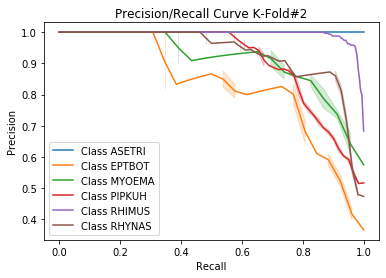

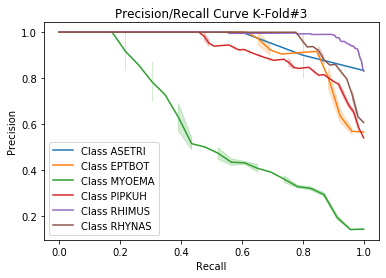

In [43]:
#Plot all K-Fold Precision/Recall curves
for i in range(n_split):
    _, axs = plt.subplots(ncols=1)
    axs.set(xlabel='Recall',ylabel='Precision', title='Precision/Recall Curve K-Fold#'+str(i+1))
    for j in range(n_classes):
        sns.lineplot(x=all_recall[i][j],y=all_precision[i][j],ax=axs, label='Class '+ getSpecies(j), legend='brief')

<h2>Storing/Loading history and model to file</h2>

In [50]:
#Store History
hist_df = pd.DataFrame(history.history) 
hist_json_file = 'Model2V2-bats.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [53]:
#Load History 
history_info = pd.read_json('Model2V2-bats.json')

In [54]:
##Save Model
model.save('Model2V2-bats_trained.model') #Save the model

In [70]:
## Load Model
model = tf.keras.models.load_model('Model2V2-bats_trained.model') #Re load model